# Various Feature Selection Techniques
# Dataset  Breast Cancer

In [18]:
import pandas as pd
import numpy as np

In [19]:
df = pd.read_csv("breast_cancer.csv")

In [20]:
df.head(n=10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,M
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,M
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,M
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,M
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,M


In [21]:
# To show all hidden columns
pd.pandas.set_option('display.max_columns',None) 
df.head(n=10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,M
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,M
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,M
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,M
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,M


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [23]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [24]:
df_train = df.iloc[:,:-1]
df_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [25]:
df_target = df.iloc[:,-1]
df_target

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

# Checking for imbalanced data
## The target feature should have sufficient entries for each category in the dataset

In [26]:
df_target.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

## <font color='red'>Here we can see that our dataset has round 60-40 distribution which is good enough for our model to learn about different categoreis</font>

# Applying Logistic Regression when no feture selection technique is used

In [27]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
names = df.columns
scaled_df = scaler.fit_transform(df_train)
scaled_df = pd.DataFrame(scaled_df)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(scaled_df, df_target, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.96


# Removing Constant features
## Constant features are those features which have same value across the dataset

In [46]:
from sklearn.feature_selection import VarianceThreshold

In [47]:
constant_filter = VarianceThreshold(threshold=0)

In [48]:
constant_filter.fit(df_train)

VarianceThreshold(threshold=0)

In [49]:
# Number of non contant features
len(df_train.columns[constant_filter.get_support()])

30

In [50]:
# Number of constant features
constant_columns = [column for column in df_train.columns
                    if column not in df_train.columns[constant_filter.get_support()]]

print(len(constant_columns))
# So there are no constant features in the dataset

0


# Removing Quasi-Constant features
## Constant features are those features which have very little variations in their  value across the dataset

In [51]:
# Extracting on those features which have more than 99.9 similarity between them
q_constant_filter = VarianceThreshold(threshold=0.001)

In [52]:
q_constant_filter.fit(df_train)

VarianceThreshold(threshold=0.001)

In [53]:
# Number of non quasi-constant features
len(df_train.columns[q_constant_filter.get_support()])

19

In [54]:
# Number of quasi-constant features
q_constant_columns = [column for column in df_train.columns
                    if column not in df_train.columns[q_constant_filter.get_support()]]

print(len(q_constant_columns))
# So there are 11 constant features in the dataset

11


In [55]:
# List of features having more than 99.9% similarity in their values
for column in q_constant_columns:
    print(column)

smoothness_mean
symmetry_mean
fractal_dimension_mean
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se
smoothness_worst
fractal_dimension_worst


In [56]:
# Removing these 11 features from the dataset
df_train_quasi = q_constant_filter.transform(df_train)
df_train_quasi.shape

(569, 19)

# Removing duplicate features
## Duplicate features are the features that have similar values. Duplicate features do not add any value to algorithm training, rather they add overhead and unnecessary delay to the training time.

In [67]:
train_features_T = df_train.T
train_features_T.shape

(30, 569)

In [69]:
# Finding duplicate rows(features) in the dataset
print(train_features_T.duplicated().sum())

0


### So there are no duplicate features in the dataset

# Removing features that have multi-collinearity
## Correlated features convey redundant information to the model and should be removed from the dataset

In [59]:
correlated_features = set()
correlation_matrix = df_train.corr()

In [60]:
correlation_matrix 

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


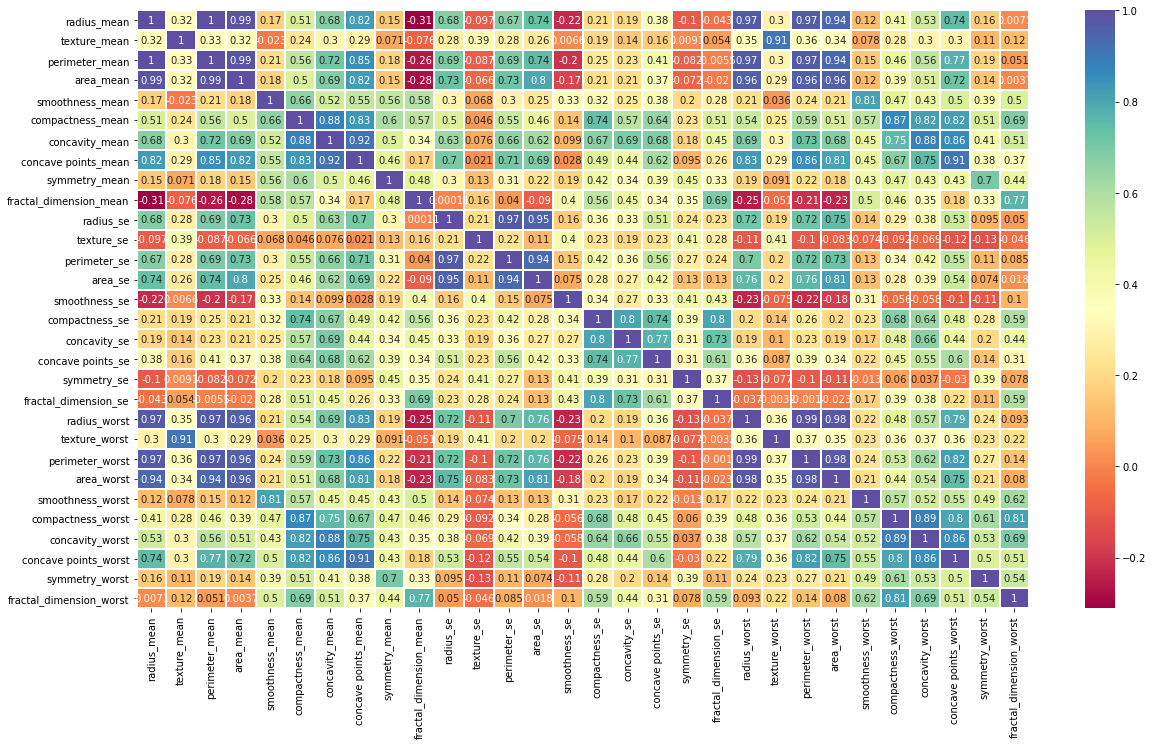

In [338]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,11))
fig = sns.heatmap(correlation_matrix,cmap="Spectral",annot = True,linewidths=1)

## Dark colored boxes inside heatmap showing high collinearity between the features

In [326]:
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [327]:
len(correlated_features)

17

### So there are 17 correlated features
### List of features having collinearity greater than 80%

In [75]:
correlated_features

{'area_mean',
 'area_se',
 'area_worst',
 'compactness_worst',
 'concave points_mean',
 'concave points_worst',
 'concavity_mean',
 'concavity_se',
 'concavity_worst',
 'fractal_dimension_se',
 'fractal_dimension_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst',
 'smoothness_worst',
 'texture_worst'}

In [79]:
# Removing correlated features only keeping one feature out of these 10 features
train_features_no_corr = df_train.drop(labels={'area_mean',
 'area_se',
 'area_worst',
 'compactness_worst',
 'concave points_mean',
 'concave points_worst',
 'concavity_se',
 'concavity_worst',
 'fractal_dimension_se',
 'fractal_dimension_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst',
 'smoothness_worst',
 'texture_worst'}, axis=1)

In [80]:
train_features_no_corr.shape

(569, 14)

In [167]:
# Also removing quasi constant features that were detected above to feed the data to model
q_constant_filter.fit(train_features_no_corr)
df_train_quasi_no_corr = q_constant_filter.transform(train_features_no_corr)
df_train_quasi_no_corr.shape

(569, 7)

## Applying Logistic regression After removing correlated and quasi constant features

In [168]:
scaled_df = scaler.fit_transform(df_train_quasi_no_corr)
scaled_df = pd.DataFrame(scaled_df)

In [171]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, df_target, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [172]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.96


# Fisher Score

In [120]:
def fisher_score(column_name):
    means=[]
    variance=[]
    for data in ['M','B']:
            df1=df[df['diagnosis']==data]
            means.append(df1[column_name].mean())
            variance.append(df1[column_name].var())
    fisher=((means[0]-means[1])**2)/(variance[0]+variance[1])
    return fisher

In [121]:
fisher_score("fractal_dimension_worst") 

0.22305236116738406

In [124]:
fisher_dict={}
for i in list(df_train.columns):
    fisher_dict[i]=fisher_score(i)
    print(i,"\t",fisher_dict[i])

radius_mean 	 2.1035906845539043
texture_mean 	 0.45022234467578076
perimeter_mean 	 2.2535632667111107
area_mean 	 1.7327863146040825
smoothness_mean 	 0.31961534554833615
compactness_mean 	 1.0455663035077454
concavity_mean 	 1.7511379779632783
concave points_mean 	 2.7030027242794126
symmetry_mean 	 0.2541614807829382
fractal_dimension_mean 	 0.0003409888204463632
radius_se 	 0.8018697877722508
texture_se 	 0.00015431699210919308
perimeter_se 	 0.7507031853609111
area_se 	 0.6912081341066031
smoothness_se 	 0.0097560541339863
compactness_se 	 0.19418087441109114
concavity_se 	 0.16158138773370062
concave points_se 	 0.42946948501011584
symmetry_se 	 8.258665050695655e-05
fractal_dimension_se 	 0.014200475314940331
radius_worst 	 2.69992208644277
texture_worst 	 0.5638990100250627
perimeter_worst 	 2.8128735980269526
area_worst 	 1.939570842708355
smoothness_worst 	 0.44996570056038016
compactness_worst 	 0.9839690427820282
concavity_worst 	 1.5359631575124593
concave points_worst 	 

In [127]:
 sorted(fisher_dict.items(), key = 
             lambda kv:(kv[1], kv[0]),reverse=True)

[('concave points_worst', 3.3916482831171537),
 ('perimeter_worst', 2.8128735980269526),
 ('concave points_mean', 2.7030027242794126),
 ('radius_worst', 2.69992208644277),
 ('perimeter_mean', 2.2535632667111107),
 ('radius_mean', 2.1035906845539043),
 ('area_worst', 1.939570842708355),
 ('concavity_mean', 1.7511379779632783),
 ('area_mean', 1.7327863146040825),
 ('concavity_worst', 1.5359631575124593),
 ('compactness_mean', 1.0455663035077454),
 ('compactness_worst', 0.9839690427820282),
 ('radius_se', 0.8018697877722508),
 ('perimeter_se', 0.7507031853609111),
 ('area_se', 0.6912081341066031),
 ('texture_worst', 0.5638990100250627),
 ('texture_mean', 0.45022234467578076),
 ('smoothness_worst', 0.44996570056038016),
 ('concave points_se', 0.42946948501011584),
 ('symmetry_worst', 0.386939706265529),
 ('smoothness_mean', 0.31961534554833615),
 ('symmetry_mean', 0.2541614807829382),
 ('fractal_dimension_worst', 0.22305236116738406),
 ('compactness_se', 0.19418087441109114),
 ('concavity_

In [38]:
#Selecting top 10 features
top_10 = ['concave points_worst','perimeter_worst','concave points_mean','radius_worst','perimeter_mean','radius_mean','area_worst','concavity_mean','area_mean','concavity_worst','compactness_mean']
fisher_top_10 = df_train[top_10]

In [93]:
#selecting top 4 features
top_4 = ['concave points_worst','perimeter_worst','concave points_mean','radius_worst']
fisher_top_4 = df_train[top_4]

In [100]:
#scaled_df = scaler.fit_transform(fisher_top_10)
scaled_df = scaler.fit_transform(fisher_top_4)
scaled_df = pd.DataFrame(scaled_df)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, df_target, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
# When top 10 features are used
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.94


In [102]:
# When top 4 features are used
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.96


## <font color='orange'>So the result was better when only top 4 features were selected as compared to when top 10 features were selected</font>

# Using ROC-AUC to filter the features

In [85]:
from sklearn.metrics import roc_auc_score, mean_squared_error

In [124]:
scaled_df = scaler.fit_transform(df_train)
scaled_df = pd.DataFrame(scaled_df)

In [125]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, df_target, test_size=0.2, random_state=0)

In [132]:
# loop to perform logistic regression on every feature and make predictions and get the roc-auc
# for each feature of the train set
roc_values = []
for feature in X_train.columns:
    logreg = LogisticRegression()
    logreg.fit(X_train[feature].to_frame(), y_train)
    y_scored = logreg.predict_proba(X_test[feature].to_frame())
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))

In [143]:
# Labelling the values with variable names
roc_values = pd.Series(roc_values)
roc_values.index = df_train.columns
roc_values.sort_values(ascending=False)

perimeter_worst            0.988250
area_worst                 0.983487
radius_worst               0.983487
concave points_mean        0.966021
concave points_worst       0.965068
perimeter_mean             0.961258
area_mean                  0.957447
radius_mean                0.954748
concavity_mean             0.943157
area_se                    0.934900
concavity_worst            0.931089
perimeter_se               0.872340
radius_se                  0.863766
compactness_worst          0.851223
compactness_mean           0.839632
concavity_se               0.821531
concave points_se          0.799936
texture_worst              0.779295
texture_mean               0.774055
compactness_se             0.750397
symmetry_worst             0.744522
smoothness_worst           0.737377
smoothness_mean            0.729755
fractal_dimension_worst    0.686567
symmetry_mean              0.686091
fractal_dimension_se       0.637345
symmetry_se                0.534773
smoothness_se              0

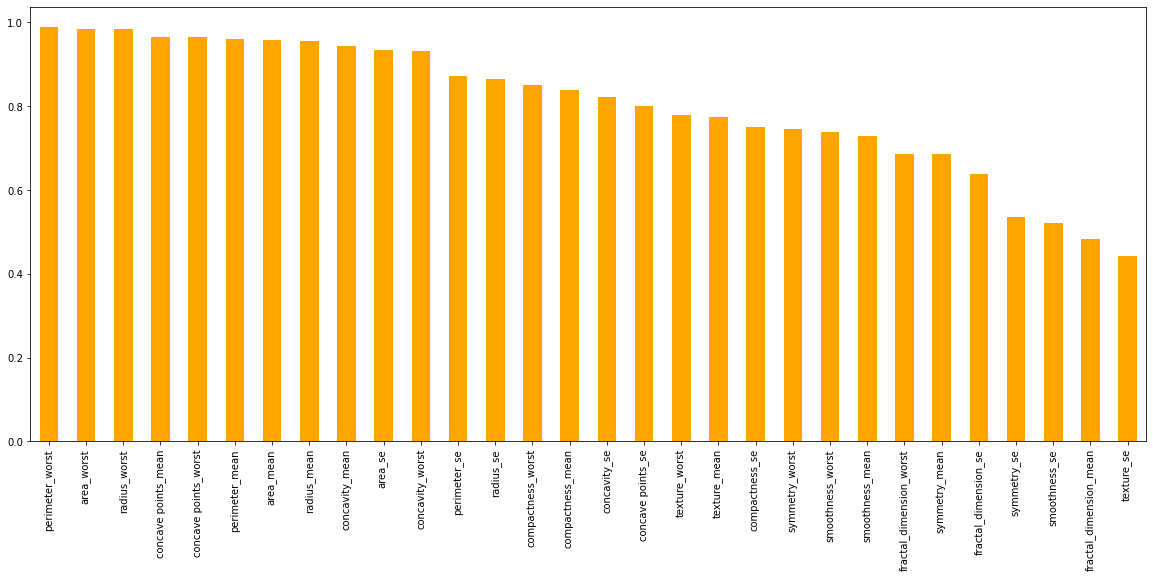

In [154]:
# Bar Plot
roc_values.sort_values(ascending=False).plot.bar(figsize=(20, 8),color='orange')

In [142]:
# a roc auc value of 0.5 indicates random decision
# let's check how many features show a roc-auc value
# higher than random

len(roc_values[roc_values > 0.5])

28

## This shows that 28 features have predictive performance higher than 0.5 so this show that 2 features can be removed from the dataset

In [157]:
df_auc = df_train.drop(labels={'fractal_dimension_mean','texture_se'},axis = 1)
df_auc.shape

(569, 28)

In [158]:
scaled_df = scaler.fit_transform(df_auc)
scaled_df = pd.DataFrame(scaled_df)

In [159]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, df_target, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [160]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.96


## <font color='red'>Results of ROC-AUC are less satisfactory as compared to other techniques as we are getting the same accuracy even after taking 28 fearures</font>

# Using Information Gain to filter the features

In [175]:
#importing the libraries
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [212]:
scaled_df = scaler.fit_transform(df_train)
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns = df_train.columns
scaled_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,0.071025,2.379583,2.604187,1.086384,0.191805,0.666001,2.067178,-1.138416,0.167980,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,2.260938,1.156857,1.291565,-0.424010,-0.069758,0.252202,0.808431,-0.189161,-0.490556,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,-0.257371,0.276693,0.180698,-0.379342,0.661277,0.510827,0.612157,-0.891416,0.036727,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,0.686088,1.438530,1.009503,-0.173000,2.017716,1.302285,0.785721,0.326634,0.904057,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [213]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, df_target, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [214]:
# calculate the mutual information between the variables and the target
# this returns the mutual information value of each feature
# the smaller the value the less information the feature has about the
# target
mi = mutual_info_classif(X_train.fillna(0), y_train)
mi

array([0.33695438, 0.08458177, 0.40741011, 0.35825078, 0.08393844,
       0.24818005, 0.37292373, 0.44626529, 0.08678757, 0.02130429,
       0.24072442, 0.        , 0.23817104, 0.33854853, 0.00733264,
       0.05722511, 0.11949564, 0.14392302, 0.        , 0.04644421,
       0.4337835 , 0.1325158 , 0.45739541, 0.45010195, 0.08961238,
       0.22234575, 0.30208868, 0.43453732, 0.0742952 , 0.0190982 ])

In [215]:
# let's add the variable names and order the features
# according to the MI for clearer visualisation
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False)

perimeter_worst            0.457395
area_worst                 0.450102
concave points_mean        0.446265
concave points_worst       0.434537
radius_worst               0.433783
perimeter_mean             0.407410
concavity_mean             0.372924
area_mean                  0.358251
area_se                    0.338549
radius_mean                0.336954
concavity_worst            0.302089
compactness_mean           0.248180
radius_se                  0.240724
perimeter_se               0.238171
compactness_worst          0.222346
concave points_se          0.143923
texture_worst              0.132516
concavity_se               0.119496
smoothness_worst           0.089612
symmetry_mean              0.086788
texture_mean               0.084582
smoothness_mean            0.083938
symmetry_worst             0.074295
compactness_se             0.057225
fractal_dimension_se       0.046444
fractal_dimension_mean     0.021304
fractal_dimension_worst    0.019098
smoothness_se              0

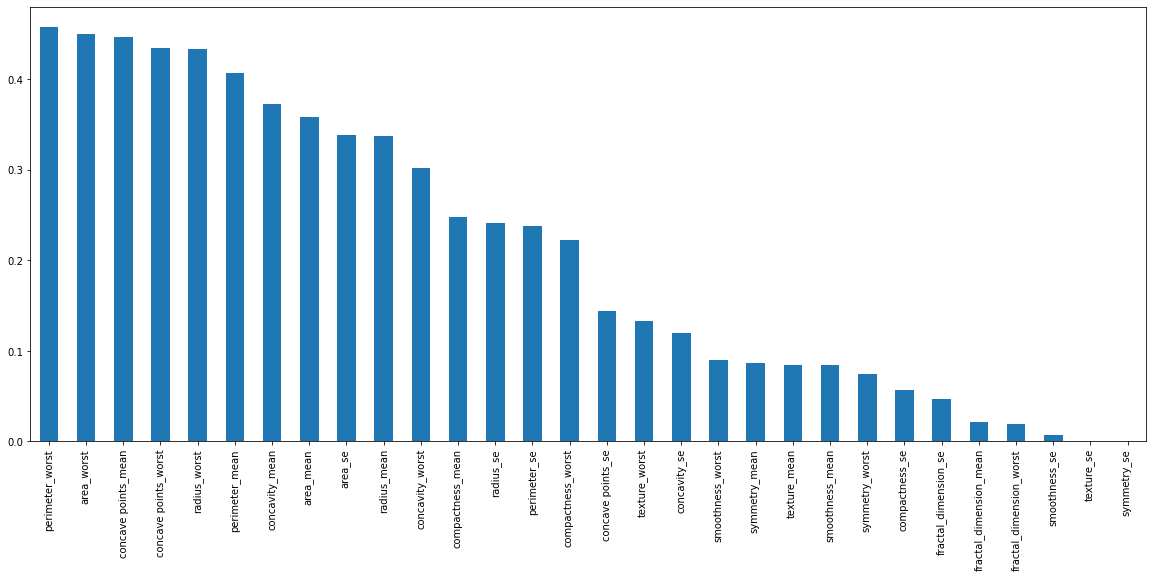

In [216]:
# Bar Plot
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [217]:
# here I will select the top 10 features
# which are shown below
sel_ = SelectKBest(mutual_info_classif, k=10).fit(X_train.fillna(0), y_train)
X_train.columns[sel_.get_support()]

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'area_se', 'radius_worst', 'perimeter_worst',
       'area_worst', 'concave points_worst'],
      dtype='object')

In [233]:
k_best = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'area_se', 'radius_worst', 'perimeter_worst',
       'area_worst', 'concave points_worst']
info_gain_k_best = df_train[k_best]
info_gain_k_best.shape

(569, 10)

In [235]:
# Applying logistic regression again
scaled_df = scaler.fit_transform(info_gain_k_best)
scaled_df = pd.DataFrame(scaled_df)
scaled_df

,0,1,2,3,4,5,6,7,8,9
0,1.097064,1.269934,0.984375,2.652874,2.532475,2.487578,1.886690,2.303601,2.001237,2.296076
1,1.829821,1.685955,1.908708,-0.023846,0.548144,0.742402,1.805927,1.535126,1.890489,1.087084
2,1.579888,1.566503,1.558884,1.363478,2.037231,1.181336,1.511870,1.347475,1.456285,1.955000
3,-0.768909,-0.592687,-0.764464,1.915897,1.451707,-0.288378,-0.281464,-0.249939,-0.550021,2.175786
4,1.750297,1.776573,1.826229,1.371011,1.428493,1.190357,1.298575,1.338539,1.220724,0.729259
...,...,...,...,...,...,...,...,...,...,...
564,2.110995,2.060786,2.343856,1.947285,2.320965,2.604187,1.901185,1.752563,2.015301,1.629151
565,1.704854,1.615931,1.723842,0.693043,1.263669,1.291565,1.536720,1.421940,1.494959,0.733827
566,0.702284,0.672676,0.577953,0.046588,0.105777,0.180698,0.561361,0.579001,0.427906,0.414069
567,1.838341,1.982524,1.735218,3.296944,2.658866,1.009503,1.961239,2.303601,1.653171,2.289985


In [238]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, df_target, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((455, 10), (114, 10))

In [239]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [240]:
y_prediction = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.95


#  Chi-Square Method

In [241]:
#Checking For Important Features Using ChiSAquare
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [242]:
order_feature=SelectKBest(score_func=chi2,k=10)

In [247]:
X_train, X_test, y_train, y_test = train_test_split(df_train, df_target, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [249]:
order_rank=order_feature.fit(X_train,y_train)

In [252]:
df_scores=pd.DataFrame(order_rank.scores_,columns=['Score'])
dfcols=pd.DataFrame(X_train.columns)

In [253]:
features_rank=pd.concat([dfcols,df_scores],axis=1)

In [254]:
features_rank.columns=['Features','Score']

In [255]:
features_rank.nlargest(10,'Score')

,Features,Score
23,area_worst,92917.511517
3,area_mean,43588.247204
13,area_se,7362.331681
22,perimeter_worst,2928.892544
2,perimeter_mean,1585.422910
20,radius_worst,396.202415
0,radius_mean,210.952274
12,perimeter_se,202.743541
21,texture_worst,135.206566
1,texture_mean,68.683546


In [270]:
top_10_chi = ['area_worst','area_mean','area_se','perimeter_worst','perimeter_mean','radius_worst','radius_mean','perimeter_se',
                       'texture_worst','texture_mean']
chi_filter = df_train[top_10_chi]

In [275]:
scaled_df = scaler.fit_transform(chi_filter)
scaled_df = pd.DataFrame(scaled_df)

In [276]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, df_target, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((455, 10), (114, 10))

In [277]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [278]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.96


## 10 features helped in achieving 96% accuracy

# Using ANOVA for filtering the features

In [279]:
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [280]:
X_train, X_test, y_train, y_test = train_test_split(df_train, df_target, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [289]:
# calculate the univariate statistical measure between each of the variables and the target and an array of pvalues which 
# will be compared

univariate = f_classif(X_train.fillna(0), y_train)
univariate

(array([4.99961985e+02, 9.11557426e+01, 5.37004989e+02, 4.34070280e+02,
        6.77121994e+01, 2.71682821e+02, 4.13990396e+02, 6.84650717e+02,
        5.57049384e+01, 2.89496655e-01, 2.10007201e+02, 1.40861873e-01,
        1.97711944e+02, 1.82130094e+02, 3.85125143e+00, 3.71267001e+01,
        1.95428215e+01, 7.74757216e+01, 9.40297739e-02, 1.73426929e+00,
        6.60421179e+02, 1.16351645e+02, 6.85003815e+02, 4.99643268e+02,
        9.72621767e+01, 2.52965516e+02, 3.41882254e+02, 7.69829896e+02,
        9.56970634e+01, 5.08048902e+01]),
 array([3.61813414e-075, 8.35476274e-020, 6.31036912e-079, 4.18416650e-068,
        2.02908913e-015, 3.69696430e-048, 7.57062686e-066, 1.26913755e-092,
        4.34708111e-013, 5.90807511e-001, 2.25745098e-039, 7.07601359e-001,
        1.59901834e-037, 3.98467084e-035, 5.03205590e-002, 2.36812934e-009,
        1.23268258e-005, 2.85425388e-017, 7.59256208e-001, 1.88532381e-001,
        1.67605863e-090, 2.67520200e-024, 1.18287351e-092, 3.90350271e-075

In [290]:
# let's add the variable names and order it for clearer visualisation
univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False, inplace=True)
univariate

symmetry_se                 7.592562e-01
texture_se                  7.076014e-01
fractal_dimension_mean      5.908075e-01
fractal_dimension_se        1.885324e-01
smoothness_se               5.032056e-02
concavity_se                1.232683e-05
compactness_se              2.368129e-09
fractal_dimension_worst     4.050538e-12
symmetry_mean               4.347081e-13
smoothness_mean             2.029089e-15
concave points_se           2.854254e-17
texture_mean                8.354763e-20
symmetry_worst              1.246988e-20
smoothness_worst            6.498914e-21
texture_worst               2.675202e-24
area_se                     3.984671e-35
perimeter_se                1.599018e-37
radius_se                   2.257451e-39
compactness_worst           1.417758e-45
compactness_mean            3.696964e-48
concavity_worst             2.775025e-57
concavity_mean              7.570627e-66
area_mean                   4.184166e-68
area_worst                  3.903503e-75
radius_mean     

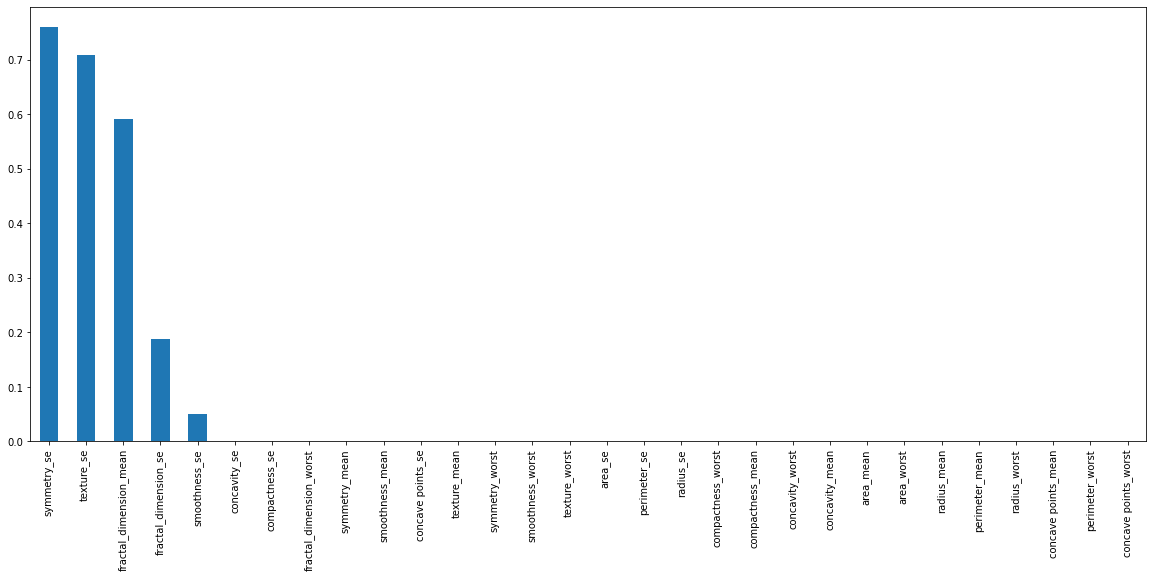

In [283]:
# and now let's plot the p values
univariate.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [284]:
# here I will select the top 10 features
sel_ = SelectKBest(f_classif, k=10).fit(X_train.fillna(0), y_train)
X_train.columns[sel_.get_support()]

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

In [295]:
top_10_annova = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst']
top_10_data = df_train[top_10_annova]

In [296]:
scaled_df = scaler.fit_transform(top_10_data)
scaled_df = pd.DataFrame(scaled_df)

In [298]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, df_target, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((455, 10), (114, 10))

In [299]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [300]:
y_prediction = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.94


# <font color='red'>Here we can se Chi-square is performing better than ANNOVA</font>

# Regression
## Dataset House

In [339]:
reg_data = pd.read_csv('Houses.csv')

In [347]:
reg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   Id             1460 non-null   int64  
 2   MSSubClass     1460 non-null   int64  
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   OverallQual    1460 non-null   int64  
 6   OverallCond    1460 non-null   int64  
 7   YearBuilt      1460 non-null   int64  
 8   YearRemodAdd   1460 non-null   int64  
 9   MasVnrArea     1452 non-null   float64
 10  BsmtFinSF1     1460 non-null   int64  
 11  BsmtFinSF2     1460 non-null   int64  
 12  BsmtUnfSF      1460 non-null   int64  
 13  TotalBsmtSF    1460 non-null   int64  
 14  1stFlrSF       1460 non-null   int64  
 15  2ndFlrSF       1460 non-null   int64  
 16  LowQualFinSF   1460 non-null   int64  
 17  GrLivArea      1460 non-null   int64  
 18  BsmtFull

In [394]:
reg_train = reg_data.iloc[:,:-1]
reg_train.fillna(0,inplace=True)
reg_train.isnull().sum()

Unnamed: 0       0
Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [395]:
reg_target = reg_data.iloc[:,-1].array
reg_target_df = pd.DataFrame(reg_target)
reg_target_df.shape

(1460, 1)

In [349]:
X_train, X_test, y_train, y_test = train_test_split(reg_train,reg_target, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((1022, 38), (438, 38))

In [350]:
univariate = f_regression(X_train.fillna(0), y_train)
univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False, inplace=True)

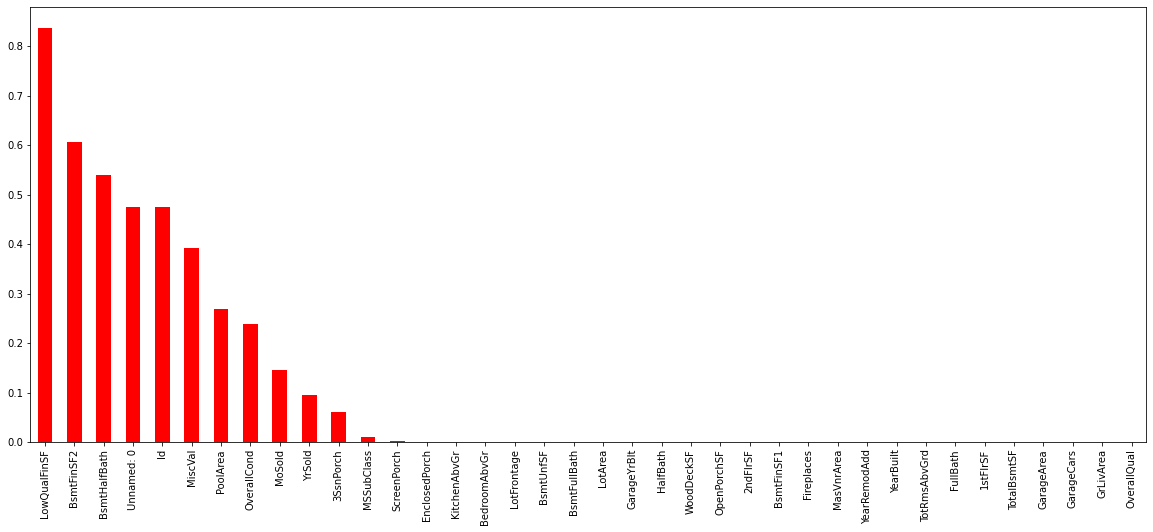

In [357]:
univariate.sort_values(ascending=False).plot.bar(figsize=(20,8),color='red')

In [358]:
# here I will select the top 10 percentile
sel_ = SelectPercentile(f_regression, percentile=10).fit(X_train.fillna(0), y_train)
X_train.columns[sel_.get_support()]

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'], dtype='object')

In [359]:
top_4 = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea']
top_4_reg = reg_train[top_4]

In [360]:
from sklearn.svm import SVR

In [403]:
# Scaling top 4 selected features
scaled_df = scaler.fit_transform(top_4_reg)
scaled_df = pd.DataFrame(scaled_df)
scaled_target = scaler.fit_transform(reg_target_df)

In [396]:
# Scaling all the features
scaled_df = scaler.fit_transform(reg_train)
scaled_df = pd.DataFrame(scaled_df)
scaled_target = scaler.fit_transform(reg_target_df)

In [404]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df,scaled_target, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((1022, 4), (438, 4))

In [405]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train,y_train)

C:\Users\Manish Sehrawat\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Accuracy before selection

In [401]:
regressor.score(X_test, y_test)

0.7530605706912489

### Accuracy After Selection

In [406]:
regressor.score(X_test, y_test)

0.767619965156905

## <font color='red'> The regression model accuracy increases by 1.5% approximately</font>